In [1]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
from sklearn.datasets import load_svmlight_file
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#### Categorias do Documento  
Como explicado na documentação, os textos são divididos em algumas categorias. Para processar os dados, deve-se converter essas strings em números.  
É importante lembrar que antes de executar o programa deve-se descompactar o arquivo *rcv1rcv2aminigoutte.tar.gz* na pasta do projeto. Isso criará a pasta *rcv1rcv2aminigoutte*, que contém os arquivos necessários para o problema.

In [2]:
categories = {'C15': 4587, 'CCAT': 8745, 'E21': 9625, 'ECAT': 5656, 'GCAT': 5745, 'M11': 45845}

Esse método faz esse tratamento dos dados, substituindo as strings correspondentes as classes em seus respectivos números.

In [3]:
def filter_datas(file, target_file):
    with open(file, 'r') as document_read:
        with open(target_file, 'w') as document_write:
            for line in document_read:
                target = line.split(None, 1)[0]
                line_to_write = '%s %s' % (categories[target], line[len(target)+1:len(line)])
                document_write.write(line_to_write)
        
    return target_file

#### Carregando o dataset no formato SVMLight

In [4]:
file = filter_datas('rcv1rcv2aminigoutte/EN/Index_EN-EN', 'svml_en_en.txt')
X,  y = load_svmlight_file(file)

#### Aplicando a seleção das features

In [5]:
clf = ExtraTreesClassifier()
clf = clf.fit(X, y)
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)

In [6]:
print('Data matrix shape before feature selection: ' + str(X.shape))
print('Data matrix shape after feature selection: ' + str(X_new.shape))

Data matrix shape before feature selection: (18758, 21531)
Data matrix shape after feature selection: (18758, 2963)


#### Dividindo o dataset
O método *train_test_split* é bem útil para dividir os dados em partes que serão usados para o treino do modelo e os testes, que serão convenientes para avaliar o modelo. Os dados de treino estarão em *x_train* e *y_train*, e os dados de teste em *x_test* e *y_test*, sendo que 25% dos dados serão usados para os testes e os outros 75% para o treinamento.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X_new,
    y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

### Avaliando os Modelos
**SVC** - Tem sua implementação baseada no *libsvm*, que é um software integrado para suporte de vetores de classificação, regressão e estimativa de distribuição, além de suportar classificação de multi-classes. O grande problema dele sua complexidade, que por ser maior que o quadrado das amostras, torna ele plausível para pouco mais de 10000 amostras 

In [8]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

In [10]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j]),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [14]:
class_as_number = [4587, 8745, 9625, 5656, 5745, 45845]
confusion = confusion_matrix(y_test, y_pred, labels=class_as_number)

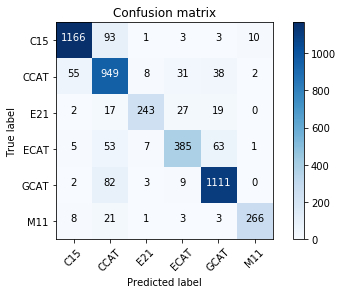

In [15]:
class_as_string = ['C15', 'CCAT', 'E21', 'ECAT', 'GCAT', 'M11']

plt.figure() 
plot_confusion_matrix(confusion, classes=class_as_string)

plt.show()

In [13]:
report = classification_report(y_test, y_pred, labels=class_as_number, target_names=class_as_string)
print(report)

             precision    recall  f1-score   support

        C15       0.94      0.91      0.93      1276
       CCAT       0.78      0.88      0.83      1083
        E21       0.92      0.79      0.85       308
       ECAT       0.84      0.75      0.79       514
       GCAT       0.90      0.92      0.91      1207
        M11       0.95      0.88      0.92       302

avg / total       0.88      0.88      0.88      4690

